##  <font color='blue'>Exploratory Data Analysis </font>
###  <font color='blue'> What is EDA? </font>
Exploratory Data Analysis (EDA) is a method of analysing datasets in order to summarise their main characteristics, frequently using visual methods.

#  Exploratory Data Analysis -Carprice Dataset

Problem Description
A Chinese automobile company Teclov_chinese aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

• Which variables are significant in predicting the price of a car
 
• How well those variables describe the price of a car 
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Table of Contents
1. Quality check of data
2. Examine data insights visually
3. Missing data
4. Imputing data
5. Detecting Outliers
6. Correlation and relationships in data
7. Pivot/Cross tab 
  



In [114]:
## Import necessary libaries

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lets examine the cars dataset with 25 attributes having attribute names like Carname,fueltype,doornumber,car''s body,the location of engine etc 

In [108]:
df = pd.read_csv('CarPrice.csv')

Understand the data and quality of data by describing the data 
#### 1. Quality check of data

In [109]:
df.head(10)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0
5,0,peugeot 604sl,gas,turbo,four,sedan,rwd,NaN,108.0,186.7,68.3,56.0,3130.0,l,four,134,mpfi,3.61,3.21,7.0,142,5600.0,18.0,24.0,18150.0
6,0,subaru baja,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2340.0,ohcf,four,108,mpfi,3.62,2.64,9.0,94,5200.0,26.0,32.0,9960.0
7,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800.0,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900.0,17.0,25.0,37028.0
8,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,NaN,55.5,3062.0,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,19.0,25.0,22625.0
9,0,toyota corolla,diesel,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2275.0,ohc,four,110,idi,3.27,3.35,22.5,56,4500.0,NaN,47.0,7788.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         153 non-null    int64  
 1   CarName           153 non-null    object 
 2   fueltype          150 non-null    object 
 3   aspiration        151 non-null    object 
 4   doornumber        152 non-null    object 
 5   carbody           153 non-null    object 
 6   drivewheel        153 non-null    object 
 7   enginelocation    142 non-null    object 
 8   wheelbase         151 non-null    float64
 9   carlength         150 non-null    float64
 10  carwidth          149 non-null    float64
 11  carheight         151 non-null    float64
 12  curbweight        152 non-null    float64
 13  enginetype        153 non-null    object 
 14  cylindernumber    152 non-null    object 
 15  enginesize        153 non-null    int64  
 16  fuelsystem        153 non-null    object 
 1

In [9]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,153.000000,151.000000,150.000000,149.000000,151.000000,152.000000,153.000000,151.000000,150.000000,151.000000,153.000000,146.000000,150.000000,150.000000,153.000000
mean,0.790850,98.970199,174.342667,65.997987,53.774172,2574.019737,127.647059,3.342185,3.267167,10.217351,102.888889,5096.232877,25.360000,30.960000,13364.157954
std,1.259979,6.384991,12.971747,2.077826,2.493791,541.390991,42.015265,0.266828,0.310188,4.110621,37.950895,456.186804,6.794471,7.259227,8302.558158
min,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.910000,2.190000,7.000000,48.000000,4150.000000,14.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.925000,64.200000,52.000000,2143.750000,97.000000,3.140000,3.127500,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.600000,54.100000,2434.000000,120.000000,3.350000,3.290000,9.000000,95.000000,5100.000000,25.000000,31.000000,10698.000000
75%,2.000000,102.800000,184.600000,67.200000,55.700000,3036.000000,145.000000,3.595000,3.410000,9.405000,116.000000,5400.000000,30.000000,36.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,3.940000,4.170000,23.000000,207.000000,6000.000000,49.000000,54.000000,45400.000000


In [10]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [52]:
##Understand the data dictionary 
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
df['symboling'].astype('category').value_counts()

0     49
1     40
2     24
3     19
-1    18
-2     3
Name: symboling, dtype: int64

In [53]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

df['aspiration'].astype('category').value_counts()

std      124
turbo     27
Name: aspiration, dtype: int64

In [54]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
df['drivewheel'].astype('category').value_counts()

fwd    91
rwd    57
4wd     5
Name: drivewheel, dtype: int64

## 2.Examine data insights visually
Data visualization is an important component of Exploratory Data Analysis (EDA) because it allows a data analyst to “look at” their data and get to know the variables and relationships between them.

In [ ]:
Plotting the data according to the price based on engine size.

<AxesSubplot:xlabel='enginesize', ylabel='price'>

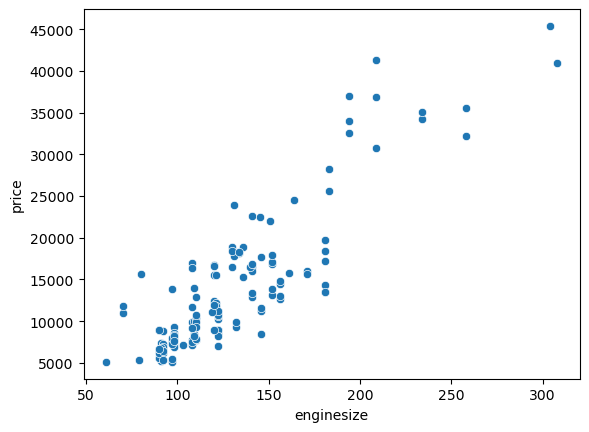

In [123]:
#sns.scatterplot(df['enginesize'], df['price'])
sns.scatterplot(data=df, x="enginesize", y="price")

#### As engine size increases price also increases.
#### Lets draw a histogram to understand enginesize 

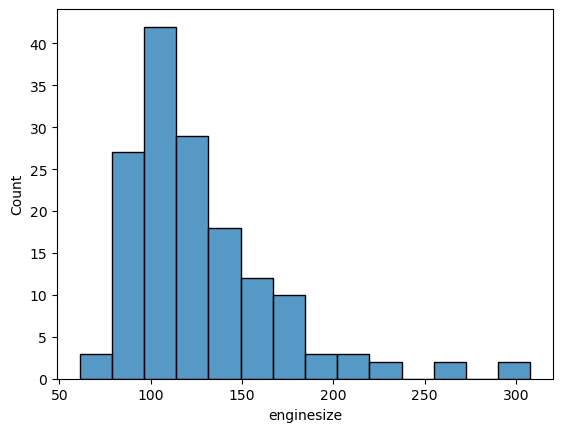

In [124]:

sns.histplot(df['enginesize']);

####  Increasing the bins to 50 in a histogram ,we can understand clearly that are few cars with more engine size

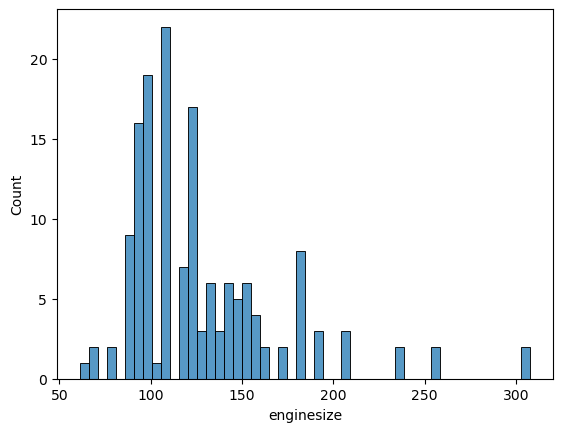

In [127]:
sns.histplot(df['enginesize'],bins=50);

#### Lets understand the frequency of price attribute with a histogram

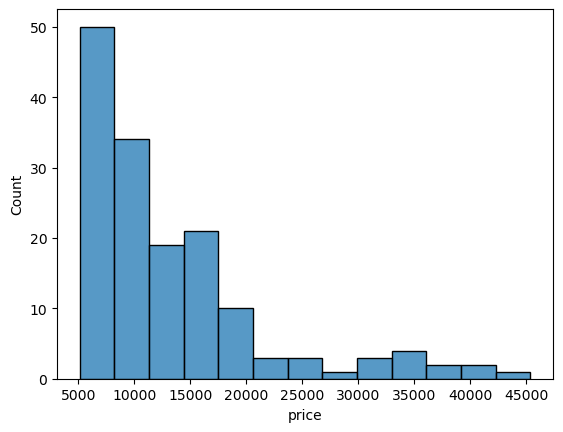

In [67]:
# target variable: price of car

sns.histplot(df['price']);


## 3. Missing data

## Lets check for missing values 
- There may be some missing values in our dataset. 
- We cannot train our model using a dataset with missing values. 
- As a result, we must determine whether our dataset contains any missing values.
The missing data, or missing values, are values which occur when no data is stored for the variable in an observation. Understanding the concept of missing values is important in order to successfully manage data. Missing data often occur in data and needs to be handled properly. Improper handling may affect results obtained by the researcher.

In [11]:
df.isna()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
## Sum of Missing values for each attribute

In [12]:
df.isna().sum()

symboling            0
CarName              0
fueltype             3
aspiration           2
doornumber           1
carbody              0
drivewheel           0
enginelocation      11
wheelbase            2
carlength            3
carwidth             4
carheight            2
curbweight           1
enginetype           0
cylindernumber       1
enginesize           0
fuelsystem           0
boreratio            2
stroke               3
compressionratio     2
horsepower           0
peakrpm              7
citympg              3
highwaympg           3
price                0
dtype: int64

- Lets visualize the missing values.
- Enginelocation has the highest missing values.

<AxesSubplot:>

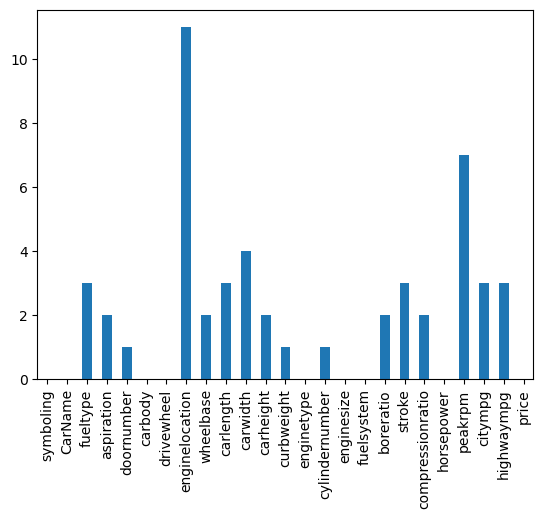

In [13]:
df.isna().sum().plot(kind='bar')

## 4. Imputing data 

#### We can deal with missing values by:

#### Delete the row/column: 
This is one of the simplest methods for dealing with missing values. If a column has a large number of missing values, we can simply remove that column from our dataset. We could also remove any rows with blank values. The only issue with this method is that we lose some information that our model requires to make accurate predictions.

#### Mean/Mode/Median Replacement:
For numerical data, we can replace missing values with the mean, mode, or median of the column containing the missing value. This allows us to save some information required by our model. The mean is generally preferred.

#### Replace with values that are close to the missing value: 
We could also replace any missing parts.

#### Fill NAN values with mean for Numerical variables

The mean function of the specific column to calculate the mean().
Then, using the fillna() function,  all the 'NaN' values in the column are replaced with mean and print the updated data frame.

In [110]:
#Finding the mean of the column having NaN
mean_value=df['compressionratio'].mean()
  
# Replace NaNs in column Age with the
# mean of values in the same column
df['compressionratio'].fillna(value=mean_value, inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
     symboling                   CarName fueltype aspiration doornumber  \
0            2               audi 100 ls      gas        std       four   
1            0               peugeot 504      gas        std       four   
2            3      mitsubishi outlander      gas      turbo        two   
3            1             toyota corona      gas        std        two   
4            2           toyota cressida      gas        std        two   
..         ...                       ...      ...        ...        ...   
148          0                 jaguar xf      NaN        std       four   
149          1  plymouth fury gran sedan      gas        std       four   
150          0  volkswagen rabbit custom   diesel      turbo       four   
151          2            toyota corolla      gas        std        two   
152          0             mazda rx-7 gs   diesel        std       four   

         carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0 

#### Fill NAN values with mean for Numerical variables Using Simple Imputer from Sklearn
- For numerical missing values, a strategy such as mean, median, most frequent, and constant can be used.

In [111]:
 from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df.wheelbase = imp_mean.fit_transform(df['wheelbase'].values.reshape(-1,1))[:,0]

In [112]:
#### Impute / Replace Missing Values with Median

df.fillna(df.median());

C:\Users\Leena Shibu\AppData\Local\Temp\ipykernel_20444\3516111128.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median());


Impute / Replace Missing Values with Mode

Yet another technique is mode imputation in which the missing values are replaced with the mode value or most frequent value of the entire feature column. When the data is skewed, it is good to consider using mode values for replacing the missing values.



In [113]:
	
df['enginesize'] = df['enginesize'].fillna(df['enginesize'].mode()[0])

You may note that the data is skewed. There are several or large numbers of data points that act as outliers. Outliers data points will have a significant impact on the mean and hence, in such cases, it is not recommended to use the mean for replacing the missing values. Using mean values for replacing missing values may not create a great model and hence gets ruled out. For symmetric data distribution, one can use the mean value for imputing missing values.

#### Fill NAN values  for Categorical  variables

In [ ]:
Replace missing values with the most frequent value.

In [105]:
df=df.fillna(df.mode().doornumber)

- Display all the unique Car names from the given data

In [14]:
df['CarName'].unique()

array(['audi 100 ls', 'peugeot 504', 'mitsubishi outlander',
       'toyota corona', 'toyota cressida', 'peugeot 604sl', 'subaru baja',
       'porsche boxter', 'volvo 264gl', 'toyota corolla',
       'volvo 145e (sw)', 'maxda glc deluxe', 'jaguar xj', 'mazda 626',
       'bmw x3', 'volkswagen dasher', 'audi 5000',
       'peugeot 505s turbo diesel', 'mazda rx-4', 'nissan teana',
       'nissan titan', 'honda civic cvcc', 'honda accord cvcc', 'subaru',
       'bmw 320i', 'honda civic (auto)', 'nissan note',
       'mitsubishi montero', 'alfa-romero stelvio', 'toyota mark ii',
       'volkswagen 411 (sw)', 'toyota corona liftback',
       'mitsubishi mirage', 'mitsubishi lancer', 'porsche cayenne',
       'bmw z4', 'volvo 245', 'dodge coronet custom (sw)',
       'porcshce panamera', 'dodge coronet custom', 'volvo 244dl',
       'mitsubishi g4', 'audi 5000s (diesel)', 'vokswagen rabbit',
       'toyouta tercel', 'mitsubishi mirage g4', 'buick century special',
       'mazda glc', 'maxda

- Display all the details of Carname ='toyota corona'

In [20]:
df[df['CarName'] == 'toyota corona']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
101,1,toyota corona,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2204.0,ohc,four,98,2bbl,3.19,NaN,9.0,70,4800.0,29.0,34.0,8238.0
115,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016.0,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200.0,19.0,24.0,15998.0
122,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2275.0,ohc,four,110,idi,3.27,3.35,22.5,56,4500.0,34.0,36.0,7898.0


- Display all the details of Carname ='audi 100 ls'

In [50]:
df[df['CarName'] == 'audi 100 ls']

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500.0,24.0,30.0,13950.0


In [87]:
### Binning with bins=10 using histogram to visualize the carheight 

(array([ 9., 20., 17., 19., 17., 21., 28., 12.,  1.,  7.]),
 array([48.8, 49.9, 51. , 52.1, 53.2, 54.3, 55.4, 56.5, 57.6, 58.7, 59.8]),
 <BarContainer object of 10 artists>)

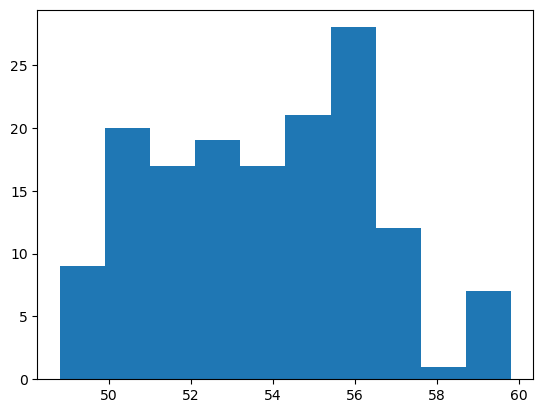

In [24]:
plt.hist(df['carheight'],bins=10)

## 5. Detecting Outliers

#### Lets check the Price column values using Boxplot and we can see outliers with some cars having high price between 30000 and 45000

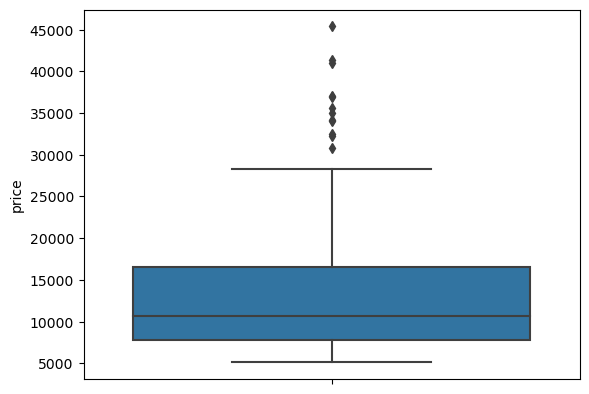

In [75]:

sns.boxplot(y=df.price);


Business Insights:  The price field has an average around 13K and a median around 10k with the most expensive car values at 45k and the cheapest cars at 5k.



Since we have mean > median, then our distribution is positively asymmetric, as we can see in the following histogram:

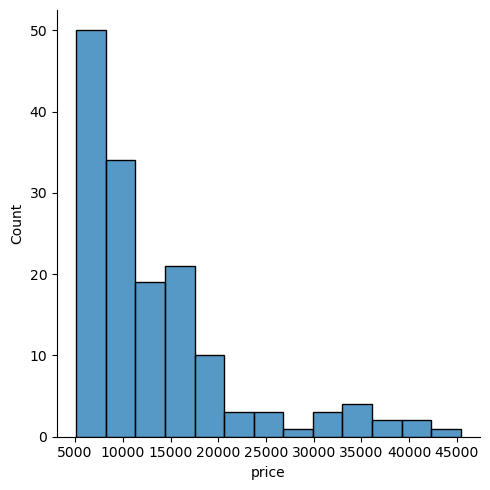

In [89]:

sns.displot(df.price);


#### Conclusion: 

Which means that most of the prices offered by this company are low.

As seen below, we have 75% prices are around 16k, or 25% between 17k and 45k.

In [77]:
print(df.price.describe())

count      153.000000
mean     13364.157954
std       8302.558158
min       5118.000000
25%       7775.000000
50%      10698.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


## Corelation and relationships in data

#### Let's now make a pairwise scatter plot and observe linear relationships.

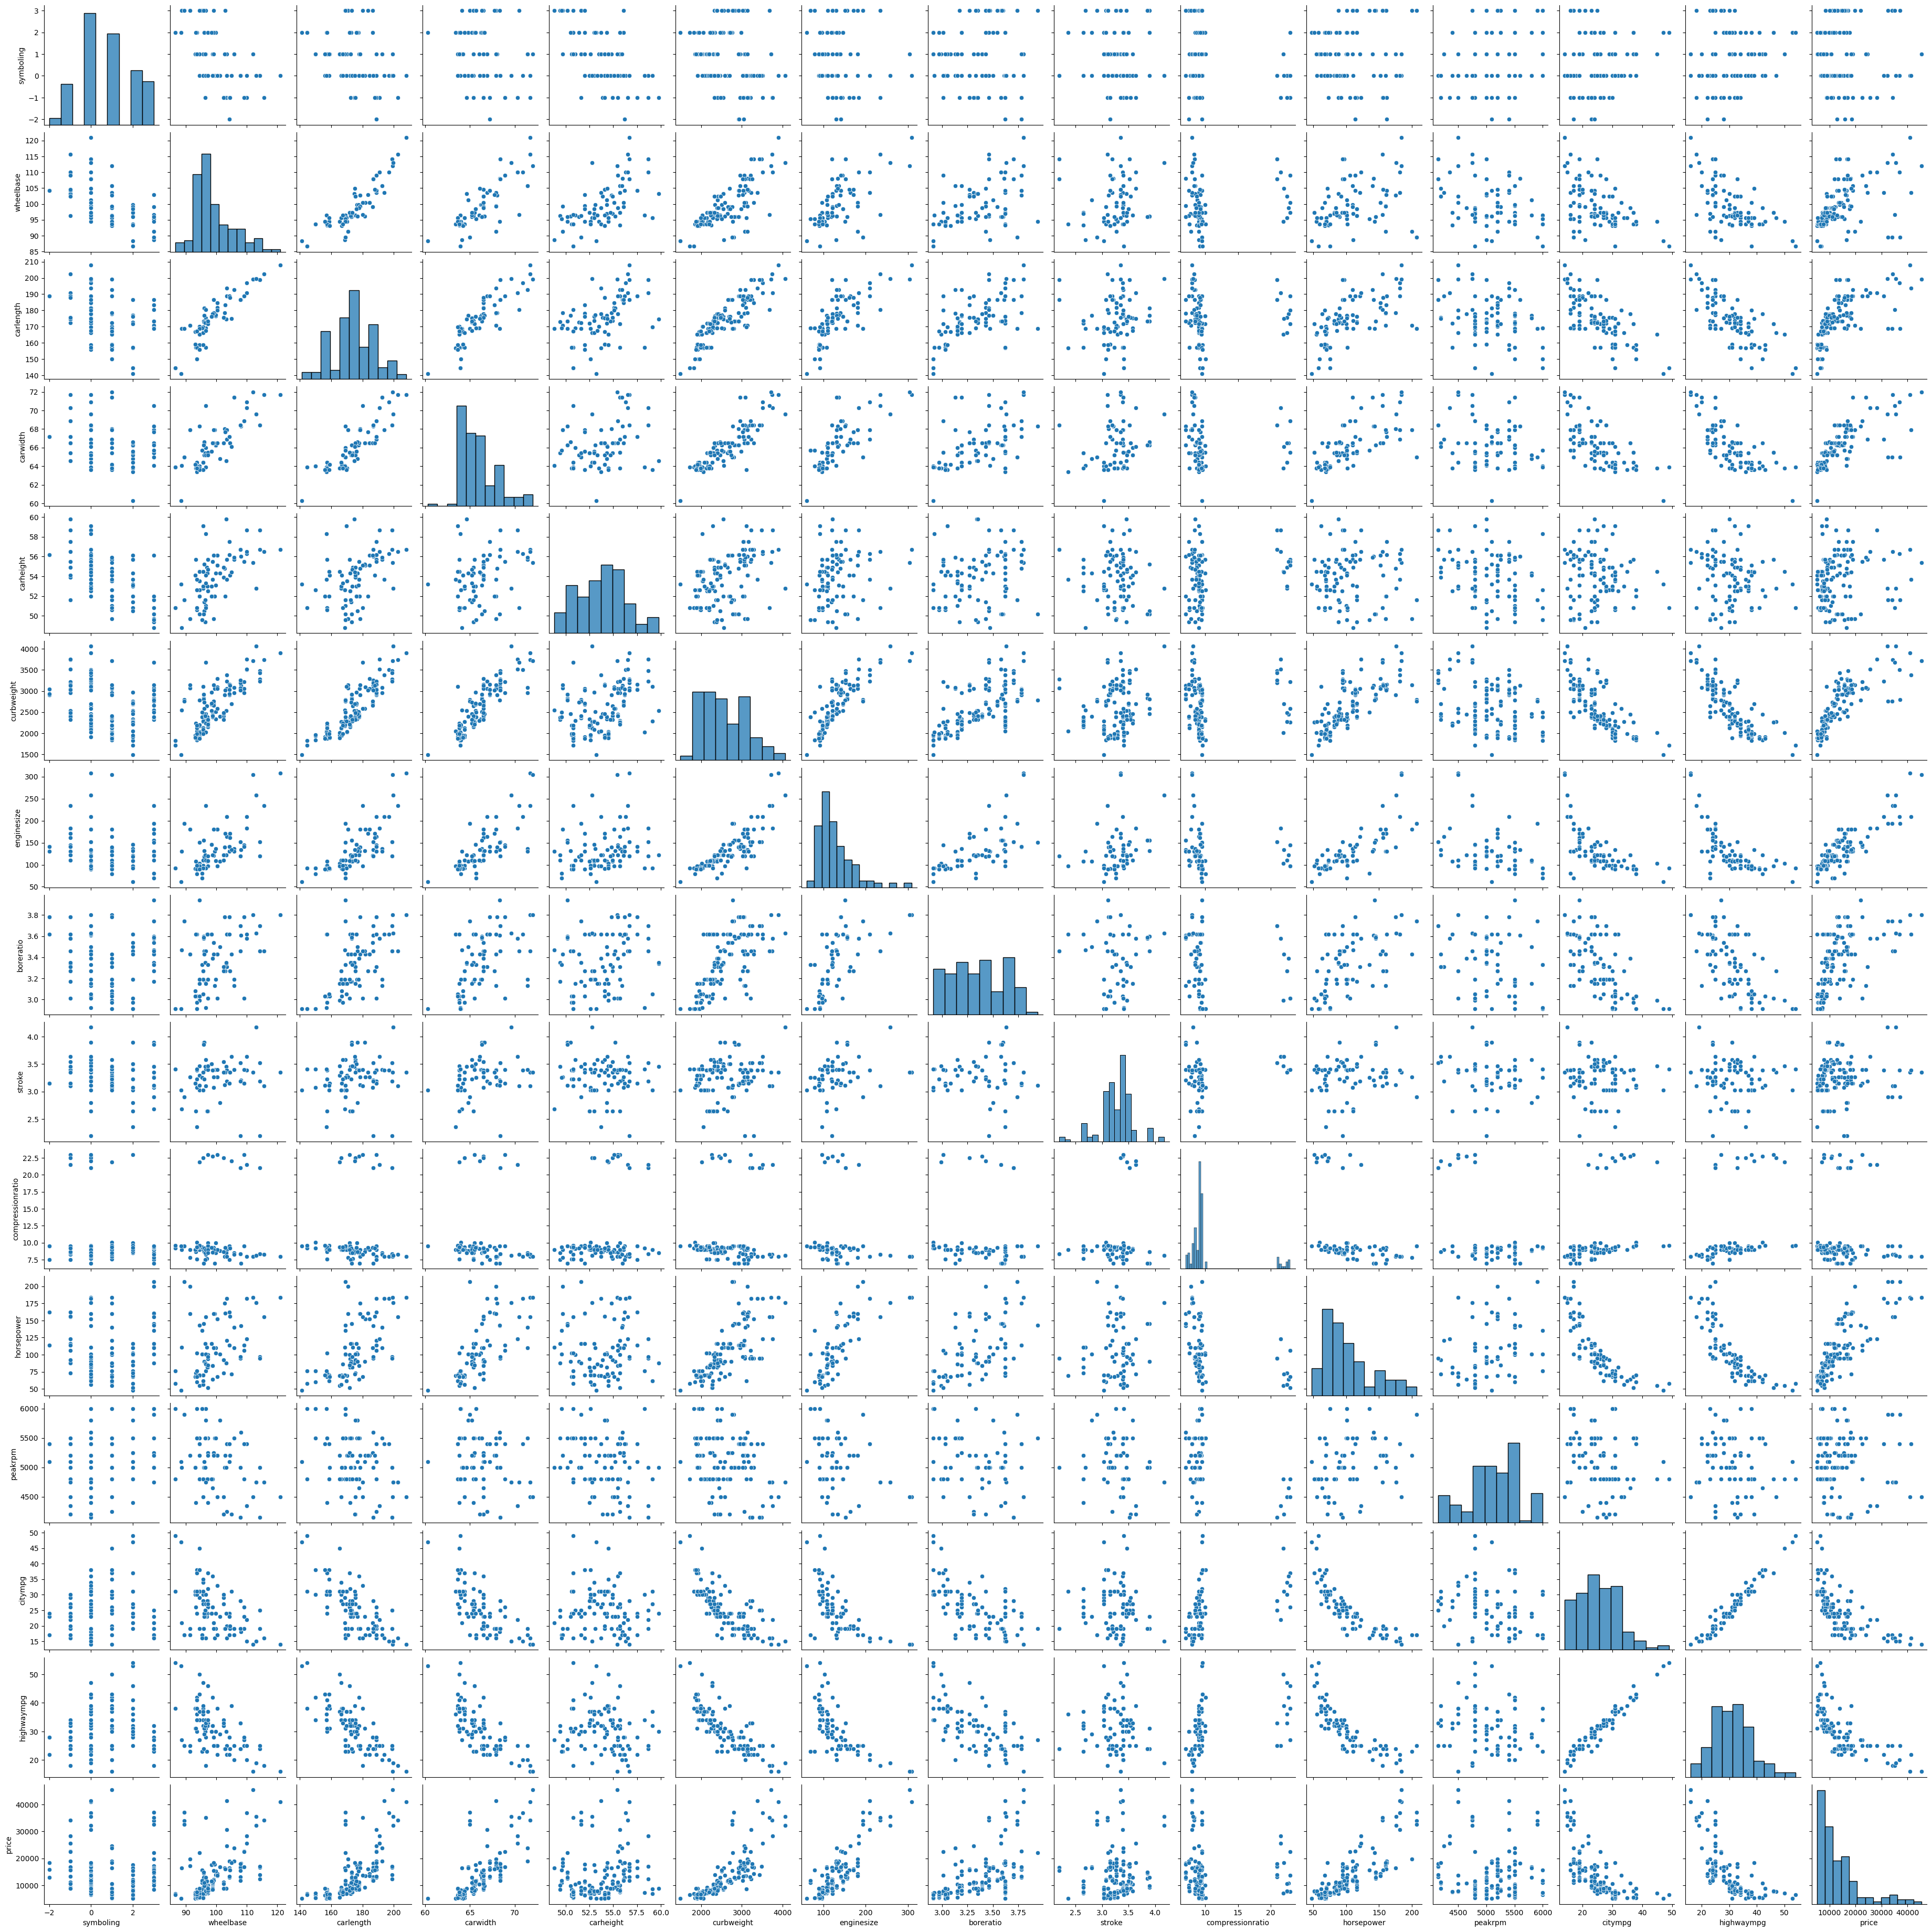

In [78]:
# paiwise scatter plot for numeric variables
sns.pairplot(df)
plt.show()

We can find the pairwise correlation between the different columns of the data using the corr() method. (Note – All non-numeric data type column will be ignored.)
The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Total positive linear correlation
0: No linear correlation, the two variables most likely do not affect each other
-1: Total negative linear correlation
Pearson Correlation is the default method of the function “corr”.

In [79]:
# correlation matrix
cor = df.corr()
cor

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.551201,-0.383470,-0.242665,-0.601380,-0.236977,-0.079449,-0.107170,0.028847,-0.215635,0.087290,0.319939,-0.021948,0.050119,-0.053059
wheelbase,-0.551201,1.000000,0.882033,0.810738,0.607544,0.784367,0.578227,0.500669,0.156859,0.232750,0.352040,-0.396600,-0.476294,-0.562060,0.549483
carlength,-0.383470,0.882033,1.000000,0.866678,0.503397,0.883286,0.695210,0.660219,0.149959,0.114189,0.563351,-0.323860,-0.683373,-0.725075,0.663895
carwidth,-0.242665,0.810738,0.866678,1.000000,0.344851,0.876509,0.750035,0.584719,0.209609,0.124876,0.619986,-0.280955,-0.674329,-0.726466,0.737575
carheight,-0.601380,0.607544,0.503397,0.344851,1.000000,0.338243,0.134504,0.221025,-0.096859,0.244944,-0.051715,-0.342354,-0.062768,-0.136964,0.144977
curbweight,-0.236977,0.784367,0.883286,0.876509,0.338243,1.000000,0.845824,0.693293,0.199977,0.112944,0.747940,-0.273141,-0.763997,-0.812236,0.810280
enginesize,-0.079449,0.578227,0.695210,0.750035,0.134504,0.845824,1.000000,0.634842,0.266312,-0.009532,0.815814,-0.226361,-0.662018,-0.699006,0.878902
boreratio,-0.107170,0.500669,0.660219,0.584719,0.221025,0.693293,0.634842,1.000000,-0.097728,0.010477,0.606855,-0.242662,-0.635716,-0.648609,0.577615
stroke,0.028847,0.156859,0.149959,0.209609,-0.096859,0.199977,0.266312,-0.097728,1.000000,0.160432,0.147254,-0.128265,-0.082157,-0.076550,0.096792
compressionratio,-0.215635,0.232750,0.114189,0.124876,0.244944,0.112944,-0.009532,0.010477,0.160432,1.000000,-0.257805,-0.481905,0.317417,0.274963,0.011907


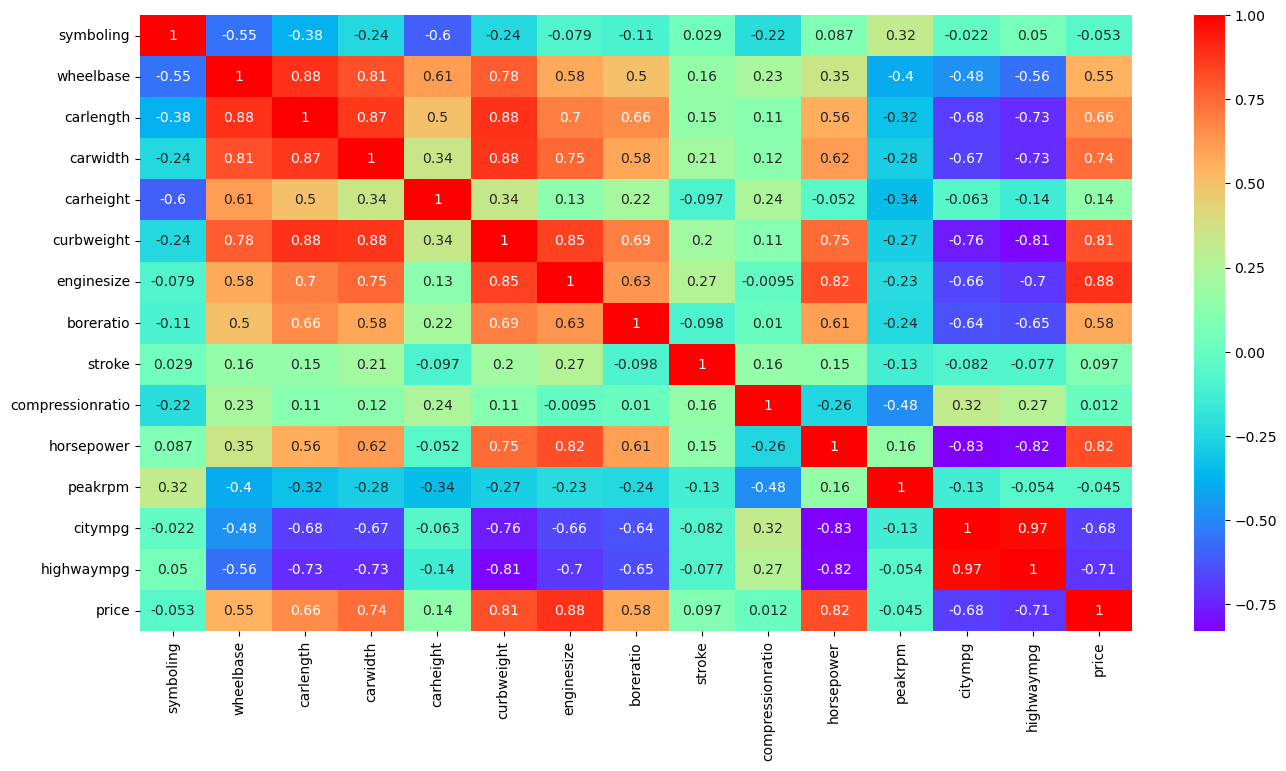

In [80]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think Maruti Alto/Swift type of cars, which are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

#### Is there a relation between Car width and curbweight 
We can see as carwidth increase curbweight also increases.

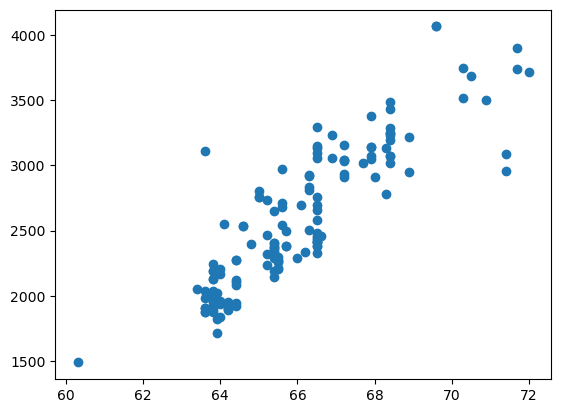

In [83]:

plt.scatter(df['carwidth'],df['curbweight'])

<AxesSubplot:>

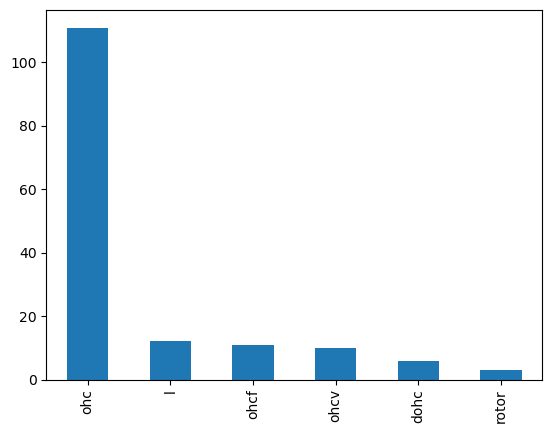

In [30]:
df['enginetype'].value_counts().plot(kind='bar')

In [92]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [40]:
df[['symboling','wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']].var()

symboling           1.587547e+00
wheelbase           4.076811e+01
carlength           1.682662e+02
carwidth            4.317361e+00
carheight           6.218995e+00
curbweight          2.931042e+05
enginesize          1.765283e+03
boreratio           7.119719e-02
stroke              9.621658e-02
compressionratio    1.689720e+01
horsepower          1.440270e+03
peakrpm             2.081064e+05
citympg             4.616483e+01
highwaympg          5.269638e+01
price               6.893247e+07
dtype: float64

In [91]:
df[['symboling','wheelbase','enginetype',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']].groupby('enginetype').var()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginetype,,,,,,,,,,,,,,,
dohc,3.466667,79.965667,131.591000,4.450667,3.842667,373030.666667,2879.500000,0.026720,0.327377,0.317667,570.000000,48666.666667,6.566667,10.166667,8.676123e+07
l,0.333333,48.746970,267.378909,5.456061,2.304000,269489.174242,699.537879,0.050879,0.231863,42.669318,402.454545,283681.818182,67.000000,73.242424,1.349533e+07
ohc,1.444881,21.787147,134.938203,3.219919,5.765948,200362.410008,731.137101,0.068242,0.048381,17.249303,953.722523,173926.325247,39.528542,42.631498,4.247077e+07
ohcf,1.963636,11.700545,35.992182,0.494545,1.963636,74541.254545,1676.272727,0.003142,0.025847,0.295636,3399.763636,363222.222222,29.872727,25.211111,1.545607e+08
ohcv,2.222222,101.029889,168.604444,5.347667,9.481778,111934.888889,2689.155556,0.023511,0.007484,0.256000,300.266667,95111.111111,3.277778,13.555556,1.516979e+08
rotor,0.000000,0.000000,0.000000,0.000000,0.000000,4800.000000,33.333333,0.000000,0.000000,0.000000,385.333333,0.000000,0.333333,0.000000,6.223333e+06


In [ ]:
## For each engine type display the count of carname,fueltype etc

In [93]:
df.groupby('enginetype').count()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
enginetype,,,,,,,,,,,,,,,,,,,,,,,,
dohc,6,6,5,6,6,6,6,6,6,6,6,6,6,6,6,6,5,6,6,6,6,6,6,6
l,12,12,12,12,12,12,12,9,12,11,12,10,12,12,12,12,12,12,12,12,11,12,12,12
ohc,111,111,109,109,110,111,111,106,109,109,107,111,110,110,111,111,111,108,109,111,106,109,109,111
ohcf,11,11,11,11,11,11,11,10,11,11,11,11,11,11,11,11,11,11,11,11,10,11,10,11
ohcv,10,10,10,10,10,10,10,8,10,10,10,10,10,10,10,10,10,10,10,10,10,9,10,10
rotor,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,3,3


In [44]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950.0
1,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285.0,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695.0
2,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833.0,ohc,four,156,spdi,3.58,3.86,7.0,145,5000.0,19.0,24.0,12629.0
3,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,2040.0,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800.0,31.0,38.0,6338.0
4,2,toyota cressida,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,NaN,24.0,30.0,17669.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0,jaguar xf,NaN,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066.0,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750.0,15.0,19.0,35550.0
149,1,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,167.3,63.8,50.8,2191.0,ohc,four,98,2bbl,2.97,3.23,9.4,68,5500.0,31.0,38.0,7609.0
150,0,volkswagen rabbit custom,diesel,turbo,four,sedan,fwd,front,100.4,180.2,NaN,55.1,2579.0,ohc,four,97,idi,3.01,3.40,23.0,68,4500.0,33.0,38.0,13845.0
151,2,toyota corolla,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2714.0,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800.0,24.0,30.0,11549.0


## 7. Pivot/CrossTab

Pivot Table: “Create a spreadsheet-style pivot table as a DataFrame.

####  For each Car Name what is the average boreratio,carheight,carlength etc 

In [45]:
pd.pivot_table(df, index='CarName', aggfunc='mean')
#Deleting aggfunc='mean' will yield the same value.

,boreratio,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,price,stroke,symboling,wheelbase
CarName,,,,,,,,,,,,,,,
Nissan versa,3.15,54.50,165.3,63.8,31.0,9.4,1889.0,97.0,37.0,69.0,5200.0,5499.0,3.29,1.0,94.5
alfa-romero stelvio,3.47,48.80,168.8,64.1,21.0,9.0,2548.0,130.0,27.0,111.0,5000.0,16500.0,2.68,3.0,88.6
audi 100 ls,3.19,54.30,176.6,66.2,24.0,10.0,2337.0,109.0,30.0,102.0,5500.0,13950.0,3.40,2.0,99.8
audi 4000,3.13,55.90,192.7,71.4,17.0,8.3,3086.0,131.0,20.0,140.0,5500.0,23875.0,3.40,1.0,105.8
audi 5000,3.19,55.70,192.7,71.4,19.0,8.5,2954.0,136.0,25.0,110.0,5500.0,18920.0,3.40,1.0,105.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
volvo 244dl,3.78,56.20,188.8,67.2,24.0,9.5,2935.0,141.0,28.0,114.0,5400.0,15985.0,3.15,-2.0,104.3
volvo 245,3.78,57.50,188.8,67.2,24.0,9.5,3042.0,141.0,28.0,114.0,5400.0,16515.0,3.15,-1.0,104.3
volvo 246,3.01,55.50,188.8,68.9,26.0,23.0,3217.0,145.0,27.0,106.0,4800.0,22470.0,3.40,-1.0,109.1


 ####  Create multiple indexes and specify its value and aggfunc.
 - For each Carname, display  fueltype and price 

In [46]:
pd.pivot_table(df, index=['CarName', 'fueltype'], values='price', aggfunc='sum')

,,price
CarName,fueltype,
Nissan versa,gas,5499.0
alfa-romero stelvio,gas,16500.0
audi 100 ls,gas,13950.0
audi 4000,gas,23875.0
audi 5000,gas,18920.0
...,...,...
volvo 244dl,gas,15985.0
volvo 245,gas,16515.0
volvo 246,diesel,22470.0


#### Crosstab
Create the bare minimum crosstab below. This compares the index and column to get the count.

- Display the frequency of cars for each carname and fueltype

In [86]:
pd.crosstab(index=df['CarName'], columns=df['fueltype'])

fueltype,diesel,gas
CarName,,
Nissan versa,0,1
alfa-romero stelvio,0,1
audi 100 ls,0,1
audi 4000,0,1
audi 5000,0,1
...,...,...
volvo 244dl,0,1
volvo 245,0,1
volvo 246,1,0


Conclusion
Now that we have understood and gained insight into the dataset ie
performed an Exploratory Data Analysis,
. So let’s summarize what we have learnt in this case study,

we have extensively covered pre-processing steps required to analyze data
We have covered Null value imputation methods
We have also covered step by step analyzing techniques such as Univariate analysis, Bivariate analysis, Multivariate analysis, etc